# Problem Set 3b

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

## Problem 1

BC Hydro imports/exports electricity from/to the US and Alberta. The data file `hydro.csv` includes total energy flow (in MWh) in/out of the BC Hydro system in 2022.

* Import the data and plot the histogram of energy flows.
* Find a kernel density function for the distribution of energy input/output and plot the function with the histogram.
* Use the kernel density function to determine how often BC Hydro is importing electricity.
* Define a new random variable $Y = \frac{1}{1000} \sum_{i=1}^{8760} X_i$ where each $X_i$ is the energy imported/exported in a 10 minute interval. Assume each $X_i$ is independent and is given by the kernel density function computed in the previous step. The variable $Y$ is the total yearly energy exported/imported and the units are GWh. Use the kernel density function to generate 2000 samples of $Y$. Find a kernel density function for the distribution of $Y$. (Note: there are 8760 hours in a year.)
* Find the values $A$ and $B$ such that $P(A < Y < B) = 0.9$.

Source: [BC Hydro](https://www.bchydro.com/energy-in-bc/operations/transmission/transmission-system/actual-flow-data/historical-data.html)

In [2]:
hydro = pd.read_csv('/Users/ethanwong/Desktop/school/25-26/TERM_1/2025-t1-notes/MATH360/python_lectures/DATA/hydro.csv')
hydro.head()

,month,day,hour,energy
0,1,1,1,1950
1,1,1,2,1935
2,1,1,3,1916
3,1,1,4,1846
4,1,1,5,1820


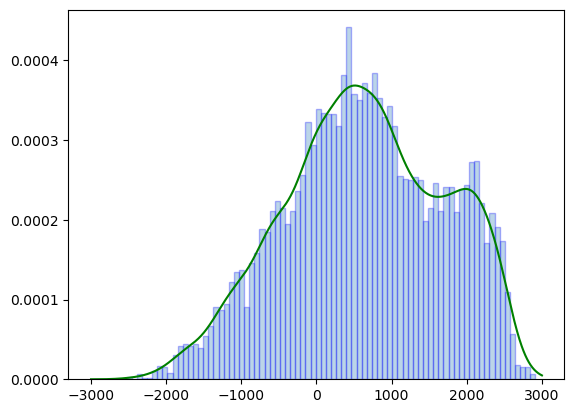

In [3]:
x = np.linspace(-3000,3000, 1000)
kde = stats.gaussian_kde(hydro['energy'])
plt.hist(hydro['energy'], bins=80, alpha=0.3, edgecolor='b', density=True)
plt.plot(x, kde(x), color='g')
plt.show()

In [4]:
# How often are we importing electricity, i.e P(X > 0)
prob = kde.integrate_box_1d(0, np.inf)
print(f'{prob*100} %')

71.98431111977628 %


In [5]:
N = 2000

y = lambda x: 1/1000 * sum(x)

Ys = []
for x in range(N):
    xi = kde.resample(size=8760).flatten()
    Ys.append(y(xi))
Ys

[5669.9651037178555,
 5732.92459408546,
 5615.731011304411,
 5591.99440760852,
 5825.869076646887,
 5515.673962007611,
 5698.7150725981855,
 5645.82000106055,
 5581.388043943117,
 5527.476861388794,
 5565.36105758063,
 5656.140109012973,
 5710.927809048431,
 5464.276669652482,
 5456.879372023867,
 5673.526628232944,
 5577.666873378232,
 5667.252094054533,
 5428.531006408159,
 5600.793457625989,
 5566.845735033063,
 5402.704430239792,
 5460.294894991629,
 5609.354709336344,
 5585.893963735087,
 5690.253875720621,
 5524.023936442949,
 5618.5835410514155,
 5659.668364969945,
 5732.466658786028,
 5486.3552057074285,
 5631.954059419074,
 5668.432691418375,
 5473.419117027596,
 5638.543304758434,
 5571.194933364878,
 5464.649959714565,
 5485.364803530179,
 5545.441123377071,
 5727.714905647117,
 5683.835147606604,
 5727.445077065257,
 5620.311606377026,
 5518.784220554271,
 5504.3017902278725,
 5505.480723947425,
 5513.67519025372,
 5478.761787603361,
 5586.245634299044,
 5659.166418018015,


(array([3.65686248e-05, 1.09705875e-04, 2.92548999e-04, 1.46274499e-04,
        4.93676435e-04, 1.09705875e-03, 1.42617637e-03, 1.75529399e-03,
        2.59637236e-03, 3.07176449e-03, 3.40088211e-03, 4.15053892e-03,
        3.91284286e-03, 3.91284286e-03, 3.34602917e-03, 2.13926455e-03,
        1.86499987e-03, 1.06049012e-03, 8.59362684e-04, 5.48529373e-04,
        1.27990187e-04, 1.09705875e-04, 5.48529373e-05, 3.65686248e-05,
        1.82843124e-05]),
 array([5274.18255327, 5301.52839973, 5328.87424618, 5356.22009264,
        5383.5659391 , 5410.91178556, 5438.25763202, 5465.60347847,
        5492.94932493, 5520.29517139, 5547.64101785, 5574.98686431,
        5602.33271076, 5629.67855722, 5657.02440368, 5684.37025014,
        5711.7160966 , 5739.06194305, 5766.40778951, 5793.75363597,
        5821.09948243, 5848.44532888, 5875.79117534, 5903.1370218 ,
        5930.48286826, 5957.82871472]),
 <BarContainer object of 25 artists>)

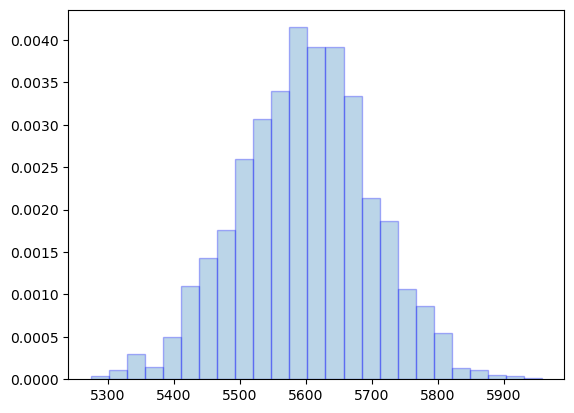

In [7]:
plt.hist(Ys, bins=25, alpha=0.3, density=True, edgecolor='b')

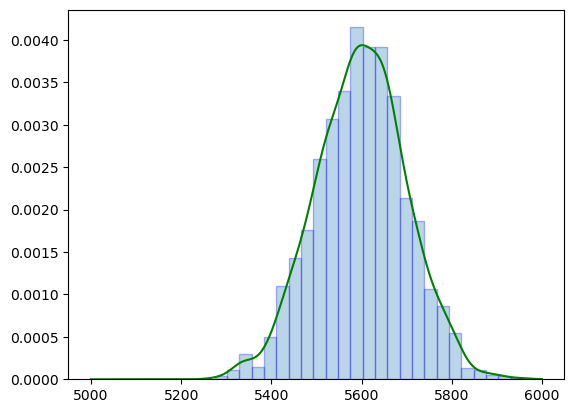

In [13]:
kde_Y = stats.gaussian_kde(Ys)
x_Y = np.linspace(5000, 6000, N)
plt.hist(Ys, bins=25, alpha=0.3, density=True, edgecolor='b')
plt.plot(x_Y, kde_Y(x_Y), color='g')

In [17]:
# Want to find P(A < X < B) = 0.9 so the 90% confidence interval
# P(X < A) = 0.05 and P(X > B) = 0.05 
mean = np.mean(Ys)
std = np.std(Ys)

a = stats.norm.ppf(0.05, mean, std)
b = stats.norm.ppf(0.95, mean, std)
(a,b)

kde_Y.integrate_box_1d(a, b)

0.8906103742611043

# Problem 2

The data file `temperature.csv` includes daily average temperature in Vancouver.

* Import the data and plot the histogram of temperature.
* Find a kernel density function for the distribution of temperature and plot the function with the histogram.
* Use the kernel density function to determine how often the temperature is above 25 degrees Celsius.
* Suppose the daily cost of heating/cooling a home is proportional to $|T - 18|$ where $T$ is the average daily temperature. Define a new random variable $Y = C_0 \sum_{i=1}^{365} |T_i - 18|$ where each $T_i$ is average temperature on day $i$ and $C_0$ is the heating/cooling cost per degree Celsius. Assume each $T_i$ is independent and is given by the kernel density function of temperature computed in the previous step. The variable $Y$ is the total yearly heating/cooling cost. Use the kernel density function to generate 2000 samples of $Y$. Find a kernel density function for the distribution of $Y$.
* Find the values $A$ and $B$ such that $P(A < Y < B) = 0.9$.

Source: [Weather Dashboard for Vancouver](https://vancouver.weatherstats.ca/download.html)

In [18]:
temp = pd.read_csv('/Users/ethanwong/Desktop/school/25-26/TERM_1/2025-t1-notes/MATH360/python_lectures/DATA/temperature.csv')
temp.head()

,year,month,day,temperature
0,2023,10,26,4.75
1,2023,10,25,7.30
2,2023,10,24,7.69
3,2023,10,23,8.19
4,2023,10,22,8.85


(array([  2.,   2.,   7.,   6.,  12.,  26.,  35.,  63., 117., 179., 302.,
        383., 548., 621., 633., 527., 453., 449., 416., 444., 510., 541.,
        521., 299., 124.,  56.,  16.,   4.,   2.,   2.]),
 array([-11.55      , -10.21833333,  -8.88666667,  -7.555     ,
         -6.22333333,  -4.89166667,  -3.56      ,  -2.22833333,
         -0.89666667,   0.435     ,   1.76666667,   3.09833333,
          4.43      ,   5.76166667,   7.09333333,   8.425     ,
          9.75666667,  11.08833333,  12.42      ,  13.75166667,
         15.08333333,  16.415     ,  17.74666667,  19.07833333,
         20.41      ,  21.74166667,  23.07333333,  24.405     ,
         25.73666667,  27.06833333,  28.4       ]),
 <BarContainer object of 30 artists>)

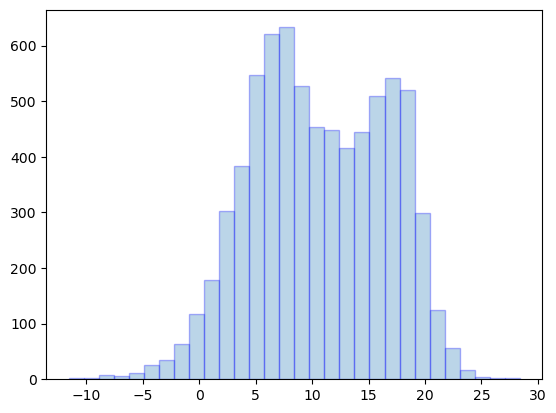

In [19]:
plt.hist(temp['temperature'], bins=30, alpha=0.3, edgecolor='b')

(array([0.00020574, 0.00020574, 0.00072008, 0.00061721, 0.00123442,
        0.00267458, 0.00360039, 0.0064807 , 0.01203559, 0.01841343,
        0.03106623, 0.03939856, 0.05637183, 0.06388122, 0.06511564,
        0.0542116 , 0.04659935, 0.04618787, 0.04279322, 0.04567353,
        0.05246284, 0.05565176, 0.05359439, 0.03075763, 0.01275567,
        0.00576063, 0.00164589, 0.00041147, 0.00020574, 0.00020574]),
 array([-11.55      , -10.21833333,  -8.88666667,  -7.555     ,
         -6.22333333,  -4.89166667,  -3.56      ,  -2.22833333,
         -0.89666667,   0.435     ,   1.76666667,   3.09833333,
          4.43      ,   5.76166667,   7.09333333,   8.425     ,
          9.75666667,  11.08833333,  12.42      ,  13.75166667,
         15.08333333,  16.415     ,  17.74666667,  19.07833333,
         20.41      ,  21.74166667,  23.07333333,  24.405     ,
         25.73666667,  27.06833333,  28.4       ]),
 <BarContainer object of 30 artists>)

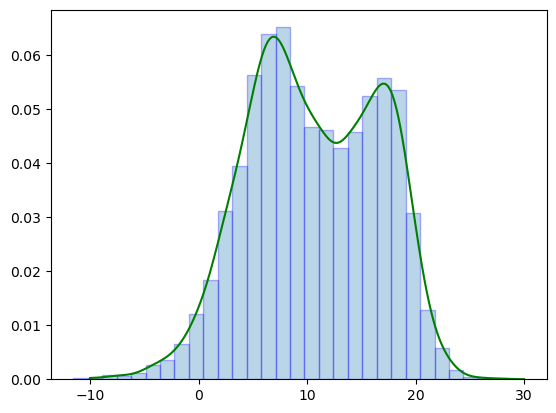

In [21]:
N = 1000
kde_X = stats.gaussian_kde(temp['temperature'])
x_temp= np.linspace(-10, 30, N)

plt.plot(x_temp, kde_X(x_temp), color='g')
plt.hist(temp['temperature'], bins=30, alpha=0.3, edgecolor='b', density=True)

In [24]:
prob = kde_X.integrate_box_1d(25, np.inf)
prob

0.0009797742290337261

(array([  3.,   3.,   4.,  16.,  20.,  39.,  54.,  59., 109., 143., 152.,
        174., 191., 187., 179., 171., 147., 114.,  73.,  65.,  45.,  16.,
         11.,  12.,   8.,   2.,   0.,   1.,   0.,   2.]),
 array([25312.31617058, 25569.01953563, 25825.72290067, 26082.42626572,
        26339.12963077, 26595.83299582, 26852.53636086, 27109.23972591,
        27365.94309096, 27622.646456  , 27879.34982105, 28136.0531861 ,
        28392.75655115, 28649.45991619, 28906.16328124, 29162.86664629,
        29419.57001133, 29676.27337638, 29932.97674143, 30189.68010647,
        30446.38347152, 30703.08683657, 30959.79020162, 31216.49356666,
        31473.19693171, 31729.90029676, 31986.6036618 , 32243.30702685,
        32500.0103919 , 32756.71375695, 33013.41712199]),
 <BarContainer object of 30 artists>)

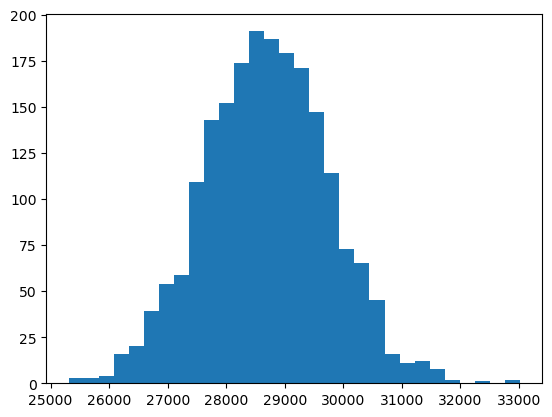

In [27]:
Y = []
N = 2000
C = 10 # 10$ per temp energy cost
for i in range(N):
    Y.append(C*sum(abs(i - 18) for i in kde_X.resample(size=365).flatten()))

plt.hist(Y, bins=30, alpha=1)
    

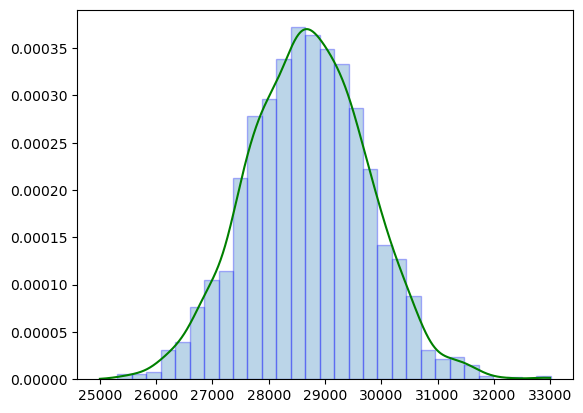

In [32]:
kde_Y = stats.gaussian_kde(Y)
x = np.linspace(25000, 33000, N)
plt.hist(Y, bins=30, alpha=0.3, density=True, edgecolor='b')
plt.plot(x, kde_Y(x), color='g')
plt.show()

In [33]:
mean_Y = np.mean(Y); std_Y = np.std(Y)
a = stats.norm.ppf(0.05, mean_Y, std_Y)
b = stats.norm.ppf(.95, mean_Y, std_Y)
(a,b)

(26949.845105023236, 30439.625617107882)

In [34]:
kde_Y.integrate_box_1d(a, b)

0.8940002990811823